In [7]:
import pandas as pd
from random import random
from numpy import array
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor 
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import RegressorChain
from sklearn.datasets import make_regression

import csv
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
from statistics import mean
from datetime import date
import datetime
import os
from sklearn.utils import check_array as check_arrays
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor

# Create folder to save results in
identify = 'TimeSeriesSKLMUltiOutputRegressorSVR_28_Stand_new'
folder_name = '/Users/clausholm/Documents/Python/Master_thesis/Data/test_results/'+identify
#os.mkdir(folder_name)


# Load Dataset
df = pd.read_csv('Dataset_DailyPlays_DomainFeatures.csv', sep=';', index_col=0, decimal=',')
df = df.drop(columns=['Slope28', 'ArtistPopularity', 'Slope56','FirstWeek','Label 2'])

# Set dataset range
df_range = '160'
df = df.loc[:, :df_range]

# Define specific test songs
list_of_test_songs = ['Katy Perry - Never Really Over' , 
              'Taylor Swift - You Need To Calm Down', 
              'Shawn Mendes & Camila Cabello - SeÃ±orita', 
              'Ava Max - So Am I', 
              'Andreas Bourani - Auf uns', 
              'Meduza feat. Goodboys - Piece Of Your Heart', 
              'Pietro Lombardi - Nur Ein Tanz', 
              'Loud Luxury feat. brando - Body', 
              'Mark Forster - Sowieso', 
              'Camila Cabello feat. Young Thug - Havana',  ] 

df


,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,33,35,34,45,29,40,47,21,30,33
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,892,807,834,762,830,828,833,841,848,817
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,608,601,636,612,608,594,599,634,567,621
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,31,33,32,29,35,33,28,29,33,30
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,180,168,173,158,162,173,154,156,146,159
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,705,756,705,667,734,687,713,757,706,774
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,864,869,919,930,876,896,837,830,844,901
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,360,306,287,319,329,343,303,313,313,315
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,1,1,3,1,0,1,1,1,3,1
Calvin Harris & Rag'n'bone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,650,718,679,665,702,655,729,741,688,663


In [8]:
# Define test data
df_test = df.loc[list_of_test_songs]
df_test

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Katy Perry - Never Really Over,145,204,222,250,182,300,391,376,377,349,...,68,89,87,59,98,109,81,129,76,74
Taylor Swift - You Need To Calm Down,70,109,202,210,222,199,205,226,297,362,...,155,147,148,172,160,134,147,197,123,146
Shawn Mendes & Camila Cabello - SeÃ±orita,322,640,569,659,666,744,750,769,781,835,...,664,592,575,574,509,527,534,509,563,468
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,705,756,705,667,734,687,713,757,706,774
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,608,601,636,612,608,594,599,634,567,621
Meduza feat. Goodboys - Piece Of Your Heart,3,0,0,4,1,1,0,10,8,10,...,562,570,689,626,597,653,654,684,703,790
Pietro Lombardi - Nur Ein Tanz,23,36,31,42,46,41,55,55,58,55,...,9,6,7,11,9,8,7,8,7,6
Loud Luxury feat. brando - Body,8,0,2,1,0,1,5,13,3,5,...,39,41,41,46,55,40,42,36,41,42
Mark Forster - Sowieso,31,47,61,75,97,120,118,120,144,136,...,1207,1256,1157,1238,1175,1144,1336,1172,1186,1272
Camila Cabello feat. Young Thug - Havana,74,117,99,143,123,128,126,147,126,153,...,907,852,846,876,799,794,842,831,792,773


In [9]:
# Define train data
df_train = df[~df.index.isin(list_of_test_songs)]
df_train

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,33,35,34,45,29,40,47,21,30,33
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,892,807,834,762,830,828,833,841,848,817
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,31,33,32,29,35,33,28,29,33,30
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,180,168,173,158,162,173,154,156,146,159
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,864,869,919,930,876,896,837,830,844,901
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,360,306,287,319,329,343,303,313,313,315
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,1,1,3,1,0,1,1,1,3,1
Calvin Harris & Rag'n'bone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,650,718,679,665,702,655,729,741,688,663
Childish Gambino - This Is America,25,51,46,48,37,49,82,78,80,83,...,34,36,32,37,45,46,47,49,47,47
Chris Brown - Undecided,41,68,75,108,111,103,98,111,120,136,...,24,21,40,35,41,35,40,40,31,28


In [10]:
# Split train dataset into input and output days. Change value of input_days
n_steps_in = 56
number_of_total_days = 140
n_steps_out = number_of_total_days - n_steps_in


# define the train data input and output
train_input_data = df_train.iloc[:, 0:n_steps_in]
train_output_data = df_train.iloc[:, n_steps_in:number_of_total_days]

# Set X and y to train input and output data
train_input = array(train_input_data)
train_output = array(train_output_data)

# create scaler
#x_scaler = MinMaxScaler()
#y_scaler = MinMaxScaler()
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# fit scaler on data
train_input = x_scaler.fit_transform(train_input)
train_output = y_scaler.fit_transform(train_output)

print("Input days: ", len(train_input[0])) 
print("Output days: ", len(train_output[0]))
print("Example of first song input data: ", train_input[0])
print("Example of first song output data: ", train_output[0])

train_input_data

Input days:  56
Output days:  84
Example of first song input data:  [-0.07962566 -0.21820747  0.03542324 -0.13880821  0.62754591  0.60763097
  0.70474838  0.77160233  0.7840484   0.13350605  0.62104972  0.21425924
  0.49865088  0.83326161  0.41214058  0.73413149  0.68208891  0.81530461
  0.81089947  0.37704373  0.45044562  0.39838092  0.5847251   0.40949604
  0.15147987  0.21309344  0.45115215  0.17990288  0.2836647   0.31353186
  0.26943918  0.06607761  0.1946229  -0.15433203 -0.1243936  -0.02084889
  0.15436038  0.21008916 -0.06599193 -0.09265562 -0.16573343 -0.28273644
 -0.33938651 -0.24249556 -0.26051886 -0.26142244 -0.2659098  -0.35852791
 -0.20039261 -0.11750617 -0.42295627 -0.20842761 -0.24840537 -0.31031851
 -0.3367925  -0.01938085]
Example of first song output data:  [-0.24732855 -0.28554291 -0.24642965 -0.22736976 -0.21826176 -0.21711596
 -0.07870443 -0.20098371  0.01612195 -0.20747113 -0.24268803 -0.07403029
 -0.19718356 -0.45156393 -0.61907244 -0.62853284 -0.6539089  -0.547

,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,167,141,189,225,131,201,186,169,159,265
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,47,55,42,63,45,40,48,43,43,37
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,110,105,91,98,116,93,111,134,96,125
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,438,413,459,464,418,463,420,406,456,451
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,1156,1115,932,1068,1096,1127,1118,1158,1169,1095
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,477,436,481,466,482,470,479,543,507,518
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,9,2,7,11,3,4,7,2,3,6
Calvin Harris & Rag'n'bone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,1251,1199,1205,1252,1221,1188,1219,1179,1201,1152
Childish Gambino - This Is America,25,51,46,48,37,49,82,78,80,83,...,110,110,90,95,84,87,87,92,82,82
Chris Brown - Undecided,41,68,75,108,111,103,98,111,120,136,...,106,87,91,88,85,94,91,86,88,79


In [11]:
# Split test dataset into input and output days.

# define the test data input and output
test_input_data = df_test.iloc[:, :n_steps_in]
test_output_data = df_test.iloc[:, n_steps_in:number_of_total_days]

# Set X and y to train input and output data
test_input = array(test_input_data)
test_output = array(test_output_data)

# transform data
test_input = x_scaler.transform(test_input)

print("Input days: ", len(test_input[0])) 
print("Output days: ", len(test_output[0]))
print("Example of first song input data: ", test_input[0])
print("Example of first song output data: ", test_output[0])

#np.any(np.isnan(test_input))
#np.all(np.isfinite(test_input))
np.isnan(test_input).any()

Input days:  56
Output days:  84
Example of first song input data:  [1.43904112 1.61968434 1.70938286 1.67074411 0.93638109 1.63360474
 2.19337479 2.10493535 1.95689752 1.65351824 1.90812303 2.01194649
 1.86382416 1.66445741 1.50238214 1.76582747 1.40902237 2.1708592
 1.54325761 2.15728161 1.54671522 1.82795946 1.77153324 1.88699213
 1.70859613 1.88876258 1.77282753 1.47527895 1.85322889 1.86882937
 1.65655033 1.75972192 1.92334856 1.63904747 1.3459981  1.65731437
 1.78668195 1.45881124 1.66575878 1.56215423 1.48488533 1.4252675
 1.44226468 1.55249242 1.40082655 1.37341043 1.37315576 1.32674399
 1.48751803 1.57675864 1.52305466 1.40048475 1.68514013 1.65038781
 1.42775357 1.60431977]
Example of first song output data:  [782 826 771 774 696 728 672 739 710 711 700 773 755 737 731 781 780 835
 760 799 775 712 701 732 724 657 709 697 649 671 627 619 681 489 572 582
 521 516 523 457 422 440 442 428 362 415 410 407 360 424 375 350 340 343
 327 192 239 193 193 207 214 164 133 215 173 156 200

False

SVR
[[ 1.43904112  1.61968434  1.70938286  1.67074411  0.93638109  1.63360474
   2.19337479  2.10493535  1.95689752  1.65351824  1.90812303  2.01194649
   1.86382416  1.66445741  1.50238214  1.76582747  1.40902237  2.1708592
   1.54325761  2.15728161  1.54671522  1.82795946  1.77153324  1.88699213
   1.70859613  1.88876258  1.77282753  1.47527895  1.85322889  1.86882937
   1.65655033  1.75972192  1.92334856  1.63904747  1.3459981   1.65731437
   1.78668195  1.45881124  1.66575878  1.56215423  1.48488533  1.4252675
   1.44226468  1.55249242  1.40082655  1.37341043  1.37315576  1.32674399
   1.48751803  1.57675864  1.52305466  1.40048475  1.68514013  1.65038781
   1.42775357  1.60431977]
 [ 0.4035865   0.59863333  1.50143756  1.30144772  1.27953129  0.86602437
   0.82941168  0.97499211  1.3882434   1.74173323  1.43118723  1.77401729
   0.96832058  1.58197233  1.09775641  1.11541044  1.58104479  1.00432616
   0.7634806   1.17560758  0.99598263  1.15984028  0.92315086  1.13022584
   1.2061

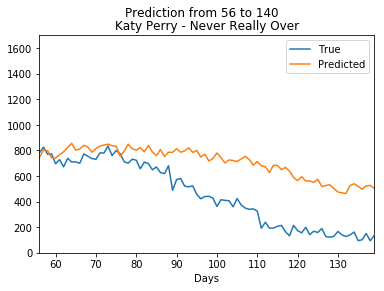

Song:  Katy Perry - Never Really Over
Prediction from 56 to 140
________________________________________________________________


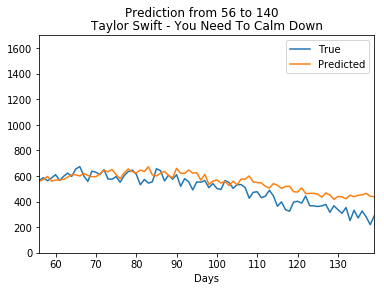

Song:  Taylor Swift - You Need To Calm Down
Prediction from 56 to 140
________________________________________________________________


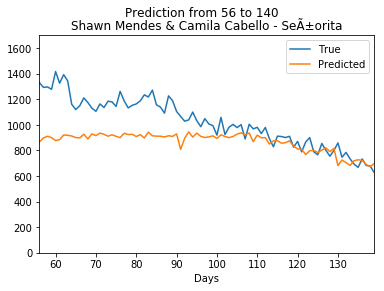

Song:  Shawn Mendes & Camila Cabello - SeÃ±orita
Prediction from 56 to 140
________________________________________________________________


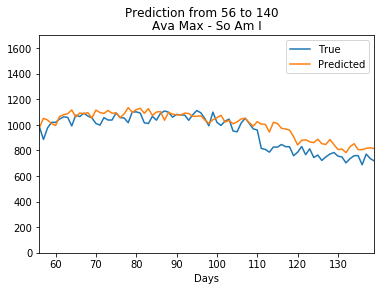

Song:  Ava Max - So Am I
Prediction from 56 to 140
________________________________________________________________


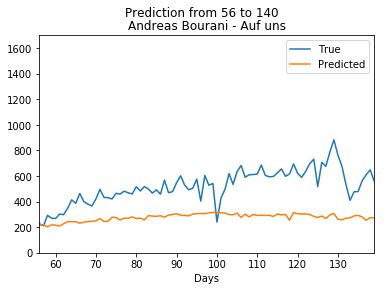

Song:  Andreas Bourani - Auf uns
Prediction from 56 to 140
________________________________________________________________


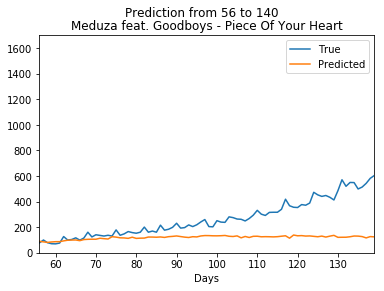

Song:  Meduza feat. Goodboys - Piece Of Your Heart
Prediction from 56 to 140
________________________________________________________________


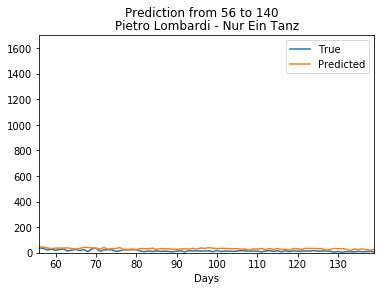

Song:  Pietro Lombardi - Nur Ein Tanz
Prediction from 56 to 140
________________________________________________________________


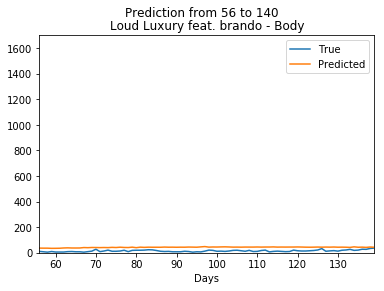

Song:  Loud Luxury feat. brando - Body
Prediction from 56 to 140
________________________________________________________________


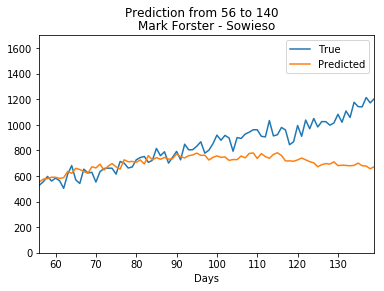

Song:  Mark Forster - Sowieso
Prediction from 56 to 140
________________________________________________________________


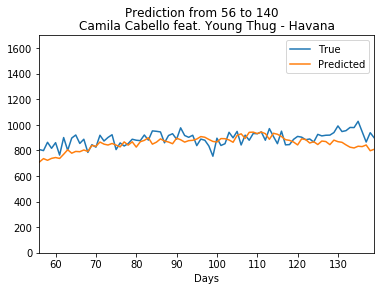

Song:  Camila Cabello feat. Young Thug - Havana
Prediction from 56 to 140
________________________________________________________________


In [13]:

models = [
    #BayesianRidge(),
    #SGDRegressor(),
    svm.SVR(),
    #GradientBoostingRegressor(),
    #LinearRegression(),
    #Lasso(),
    #Ridge(),
    #KNeighborsRegressor(),
    #GaussianProcessRegressor(),
    #DecisionTreeRegressor(),
    #RandomForestRegressor(),
    #MLPRegressor()
    
    ]

# Name the model
model_names = ['SVR']


# Make tests for all models in variable
for i in range(len(models)):
    
    model_name = model_names[i]
    print(model_name)
    
    # Make folder to each model to save results of model
    path = folder_name+'/'+model_name
    #os.mkdir(path)
    
    wrapper = MultiOutputRegressor(models[i])
    
    wrapper.fit(train_input, train_output) #training the algorithm
    
    print(test_input)
    yhat = wrapper.predict(test_input)
        
    # transform data back to original scale
    yhat = y_scaler.inverse_transform(yhat)

    # Create variable for each song, used to compare predicted and true value
    lst1 = [test_output[0], yhat[0]]
    lst2 = [test_output[1], yhat[1]]
    lst3 = [test_output[2], yhat[2]]
    lst4 = [test_output[3], yhat[3]]
    lst5 = [test_output[4], yhat[4]]
    lst6 = [test_output[5], yhat[5]]
    lst7 = [test_output[6], yhat[6]]
    lst8 = [test_output[7], yhat[7]]
    lst9 = [test_output[8], yhat[8]]
    lst10 = [test_output[9], yhat[9]]

    # Set value for labelling
    daysOrWeeks = 'Days'

    # Make dataset of test song variables
    df1 = pd.DataFrame(lst1).T
    df1.columns = ['True', 'Predicted']
    df1[daysOrWeeks] = df1.index + n_steps_in
    df1.set_index(daysOrWeeks,inplace=True)

    df2 = pd.DataFrame(lst2).T
    df2.columns = ['True', 'Predicted']
    df2[daysOrWeeks] = df2.index + n_steps_in
    df2.set_index(daysOrWeeks,inplace=True)

    df3 = pd.DataFrame(lst3).T
    df3.columns = ['True', 'Predicted']
    df3[daysOrWeeks] = df3.index + n_steps_in
    df3.set_index(daysOrWeeks,inplace=True)

    df4 = pd.DataFrame(lst4).T
    df4.columns = ['True', 'Predicted']
    df4[daysOrWeeks] = df4.index + n_steps_in
    df4.set_index(daysOrWeeks,inplace=True)

    df5 = pd.DataFrame(lst5).T
    df5.columns = ['True', 'Predicted']
    df5[daysOrWeeks] = df5.index + n_steps_in
    df5.set_index(daysOrWeeks,inplace=True)

    df6 = pd.DataFrame(lst6).T
    df6.columns = ['True', 'Predicted']
    df6[daysOrWeeks] = df6.index + n_steps_in
    df6.set_index(daysOrWeeks,inplace=True)

    df7 = pd.DataFrame(lst7).T
    df7.columns = ['True', 'Predicted']
    df7[daysOrWeeks] = df7.index + n_steps_in
    df7.set_index(daysOrWeeks,inplace=True)

    df8 = pd.DataFrame(lst8).T
    df8.columns = ['True', 'Predicted']
    df8[daysOrWeeks] = df8.index + n_steps_in
    df8.set_index(daysOrWeeks,inplace=True)

    df9 = pd.DataFrame(lst9).T
    df9.columns = ['True', 'Predicted']
    df9[daysOrWeeks] = df9.index + n_steps_in
    df9.set_index(daysOrWeeks,inplace=True)

    df10 = pd.DataFrame(lst10).T
    df10.columns = ['True', 'Predicted']
    df10[daysOrWeeks] = df10.index + n_steps_in
    df10.set_index(daysOrWeeks,inplace=True)

    # Forecast Error (or Residual Forecast Error)
    forecast_errors = [test_output[i]-yhat[i] for i in range(len(test_output))]
    #print('Forecast Errors: %s' % forecast_errors)  

    df_result = pd.DataFrame(columns=['Song', 'Date', 'Bias', 'MAE', 'MAPE', 'MSE', 'RMSE', 'RMSPE', 'Predict_from', 'Predict_to'])

    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    def root_mean_square_percentage_error(y_true, y_pred):
        loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0)) * 100
        return loss

    for i in range(len(test_output)):
        print(list_of_test_songs[i])

        # Mean Forecast Error (or Forecast Bias), Mean Absolute Error, Mean Squared Error, Root Mean Squared Error  
        bias = mean(forecast_errors[i])
        mae = mean(abs(forecast_errors[i]))
        mape = mean_absolute_percentage_error(test_output[i], yhat[i])
        mse = mean_squared_error(test_output[i], yhat[i]) 
        rmse = sqrt(mse)
        rmspe = root_mean_square_percentage_error(test_output[i], yhat[i])
        df_result = df_result.append({'Date': date.today(),'Song': list_of_test_songs[i], 'Bias': bias, 'MAE': mae, 'MAPE': mape, 'MSE': mse, 'RMSE': rmse, 'RMSPE': rmspe, 'Predict_from':n_steps_in, 'Predict_to': number_of_total_days}, ignore_index=True)

        print('Bias: %f' % bias)
        print('MAE: %f' % mae)
        print('MAPE: %f'% mape)
        print('MSE: %f' % mse)
        print('RMSE: %f' % rmse)
        print('RMSPE %f' % rmspe)
        print('_________________________')

    # Create datetime for time of results
    now = datetime.datetime.now()
    now = str(now.strftime("%Y-%m-%d %H:%M:%S"))

    # Save Results to csv file in folder
    #df_result.to_csv(path+'/'+identify+'_'+model_name+'_'+now+'.csv', sep=';', decimal=',' )

    import matplotlib.pyplot as plt 

    # Define plotting of graphs and saving them to folder
    pred_title = "Prediction from "+ str(n_steps_in)+" to "+str(number_of_total_days)
    fig_size = 1700

    df1.plot()
    plt.ylim((0,fig_size))
    plt.title(list_of_test_songs[0])
    plt.suptitle(pred_title)
    #plt.savefig(path+'/'+list_of_test_songs[0]+ '_'+ identify +'.png')
    plt.show()
    plt.close()
    print("Song: ", list_of_test_songs[0])
    print(pred_title)
    print('________________________________________________________________')

    df2.plot()
    plt.ylim((0,fig_size))
    plt.title(list_of_test_songs[1])
    plt.suptitle(pred_title)
    #plt.savefig(path+'/'+list_of_test_songs[1]+ '_'+ identify +'.png')
    plt.show()
    plt.close()
    print("Song: ", list_of_test_songs[1])
    print("Prediction from", n_steps_in, "to", number_of_total_days)
    print('________________________________________________________________')

    df3.plot()
    plt.ylim((0,fig_size))
    plt.title(list_of_test_songs[2])
    plt.suptitle(pred_title)
    #plt.savefig(path+'/'+list_of_test_songs[2]+ '_'+ identify +'.png')
    plt.show()
    plt.close()
    print("Song: ", list_of_test_songs[2])
    print("Prediction from", n_steps_in, "to", number_of_total_days)
    print('________________________________________________________________')

    df4.plot()
    plt.ylim((0,fig_size))
    plt.title(list_of_test_songs[3])
    plt.suptitle(pred_title)
    #plt.savefig(path+'/'+list_of_test_songs[3]+ '_'+ identify +'.png')
    plt.show()
    plt.close()
    print("Song: ", list_of_test_songs[3])
    print("Prediction from", n_steps_in, "to", number_of_total_days)
    print('________________________________________________________________')

    df5.plot()
    plt.ylim((0,fig_size))
    plt.title(list_of_test_songs[4])
    plt.suptitle(pred_title)
    #plt.savefig(path+'/'+list_of_test_songs[4]+ '_'+ identify +'.png')
    plt.show()
    plt.close()
    print("Song: ", list_of_test_songs[4])
    print("Prediction from", n_steps_in, "to", number_of_total_days)
    print('________________________________________________________________')

    df6.plot()
    plt.ylim((0,fig_size))
    plt.title(list_of_test_songs[5])
    plt.suptitle(pred_title)
    #plt.savefig(path+'/'+list_of_test_songs[5]+ '_'+ identify +'.png')
    plt.show()
    plt.close()
    print("Song: ", list_of_test_songs[5])
    print("Prediction from", n_steps_in, "to", number_of_total_days)
    print('________________________________________________________________')

    df7.plot()
    plt.ylim((0,fig_size))
    plt.title(list_of_test_songs[6])
    plt.suptitle(pred_title)
    #plt.savefig(path+'/'+list_of_test_songs[6]+ '_'+ identify +'.png')
    plt.show()
    plt.close()
    print("Song: ", list_of_test_songs[6])
    print("Prediction from", n_steps_in, "to", number_of_total_days)
    print('________________________________________________________________')

    df8.plot()
    plt.ylim((0,fig_size))
    plt.title(list_of_test_songs[7])
    plt.suptitle(pred_title)
    #plt.savefig(path+'/'+list_of_test_songs[7]+ '_'+ identify +'.png')
    plt.show()
    plt.close()
    print("Song: ", list_of_test_songs[7])
    print("Prediction from", n_steps_in, "to", number_of_total_days)
    print('________________________________________________________________')

    df9.plot()
    plt.ylim((0,fig_size))
    plt.title(list_of_test_songs[8])
    plt.suptitle(pred_title)
    #plt.savefig(path+'/'+list_of_test_songs[8]+ '_'+ identify +'.png')
    plt.show()
    plt.close()
    print("Song: ", list_of_test_songs[8])
    print("Prediction from", n_steps_in, "to", number_of_total_days)
    print('________________________________________________________________')

    df10.plot()
    plt.ylim((0,fig_size))
    plt.title(list_of_test_songs[9])
    plt.suptitle(pred_title)
    #plt.savefig(path+'/'+list_of_test_songs[9]+ '_'+ identify +'.png')
    plt.show()
    plt.close()
    print("Song: ", list_of_test_songs[9])
    print("Prediction from", n_steps_in, "to", number_of_total_days)
    print('________________________________________________________________')